<a href="https://colab.research.google.com/github/HasiniSandunika/cancer-detection-with-cnn/blob/master/cancer_detection_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Skin cancer image classification with CNN** 
Test accurancy : 87.5 %



In [7]:
#@title  import libraries and load the training, testing datasets
import numpy as np
import glob
import cv2
import re
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten 
import keras
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.models import load_model
#from keras.callbacks import EarlyStopping, ModelCheckpoint

###load training dataset
#def load_train_data(path):
#  images = glob.glob(path + '/*.jpg')
# x = []
# y= []
# for i in images:
#   temp = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
#   temp=np.array(temp)
#   temp = temp.astype('float32')
#   temp =temp/ 255
#   temp = cv2.resize(temp, (128, 128), interpolation = cv2.INTER_AREA) 
#   x.append(temp)
#   y.append(int(i[56:57]))
#   print(j,i[56:68],i,temp.shape,int(i[56:57]))
#  x=np.array(x)
# y=np.array(y)
# x = x.reshape(len(x), 128, 128, 1)
# y = np_utils.to_categorical(y, 2)
# np.save('/content/drive/My Drive/cancer_detection_cnn/save_files/x_train.npy',x)
# np.save('/content/drive/My Drive/cancer_detection_cnn/save_files/y_train.npy',y)

###load testing dataset
#def load_test_data(path):
# images = glob.glob(path + '/*.jpg')
# x = []
# y1= []
# labels=[]
# for i in images:
#   temp = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
#   temp=np.array(temp)
#   temp = temp.astype('float32')
#   temp =temp/ 255
#   temp = cv2.resize(temp, (128, 128), interpolation = cv2.INTER_AREA) 
#   x.append(temp)
#   y1.append(int(i[55:56]))
#   labels.append(i[55:61])
#   #print(i[55:61],i,temp.shape,int(i[55:56]))
# x=np.array(x)
# y1=np.array(y1)
# labels=np.array(labels)
# x = x.reshape(120, 128, 128, 1)
# y = np_utils.to_categorical(y1, 2)
# np.save('/content/drive/My Drive/cancer_detection_cnn/save_files/x_test.npy',x)
# np.save('/content/drive/My Drive/cancer_detection_cnn/save_files/y_test.npy',y)
# np.save('/content/drive/My Drive/cancer_detection_cnn/save_files/types_test.npy',y1)
# np.save('/content/drive/My Drive/cancer_detection_cnn/save_files/labels_test.npy',labels)
#load_train_data('/content/drive/My Drive/cancer_detection_cnn/train_data') 
#load_test_data('/content/drive/My Drive/cancer_detection_cnn/test_data') 


In [8]:
#@title  CNN model
def define_model():
  model = Sequential()
  model.add(Conv2D(filters=4  ,kernel_size=(5,5), strides=(3,3), 
                  activation='relu', input_shape=(128,128,1))) 
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))   
  model.add(Conv2D(kernel_size=(5,5), strides=(2,2), 
                  filters=4  , activation='relu', input_shape=(21,21, 1))) 
  model.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))
  model.add(Flatten())
  model.add(Dense(units=4, activation='tanh'))
  model.add(Dense(2, activation='softmax')) 
  print('\nCNN model : ')
  model.summary()
  return model


In [9]:
#@title compiling and fitting the model
def compile_fit_model(model):
  print('\nTraining the dataset : ')
  OPTIMIZER = SGD(lr=0.1)
  x_train=np.load('/content/drive/My Drive/cancer_detection_cnn/save_files/x_train.npy')
  y_train=np.load('/content/drive/My Drive/cancer_detection_cnn/save_files/y_train.npy')
  x_test=np.load('/content/drive/My Drive/cancer_detection_cnn/save_files/x_test.npy')
  y_test=np.load('/content/drive/My Drive/cancer_detection_cnn/save_files/y_test.npy')
  model.compile(optimizer=OPTIMIZER, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
  #callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             #ModelCheckpoint(filepath='/content/drive/My Drive/cancer_detection_cnn/h5_files/model.h5', monitor='val_loss', save_best_only=True)]
  model_fit = model.fit(x=x_train, y=y_train, epochs=50, #callbacks=callbacks,
                        batch_size=32, validation_data=(x_test, y_test),verbose=1)
                            
  print('Graph of epochs vs loss')
  %matplotlib inline 
  plt.figure() 
  plt.xlabel('Epochs') 
  plt.ylabel('Loss') 
  plt.plot(model_fit.history['loss']) 
  plt.plot(model_fit.history['val_loss']) 
  plt.legend(['Training', 'Validation'])
  plt.figure() 
  plt.show()
  return model
                      
          


In [10]:
#@title evalation and prediction for test dataset
def predict_test_dataset(model):
  x_test=np.load('/content/drive/My Drive/cancer_detection_cnn/save_files/x_test.npy')
  y_test=np.load('/content/drive/My Drive/cancer_detection_cnn/save_files/y_test.npy')
  y_original=np.load('/content/drive/My Drive/cancer_detection_cnn/save_files/types_test.npy')
  labels=np.load('/content/drive/My Drive/cancer_detection_cnn/save_files/labels_test.npy')
  print('\nEvalation and prediction from testing dataset: ')
  score = model.evaluate(x_test, y_test, verbose=2) 
  print('Test accuracy : ', score[1]*100,'%')
  y_predict = model.predict(x_test).argmax(axis=-1)
  print('Predictions : ')
  for i in range(0,len(y_original)):
    if y_original[i]==1:
      orig_str='malignent'
    else:
      orig_str='benign' 
    if y_predict[i]==1:
      pred_str='malignent'
    else:
      pred_str='benign'    
    print('Label : ',labels[i],'        True class : ',orig_str, '         Predicted class : ',pred_str)  



In [11]:
#@title predict the classes for new inputs
def predict_image(path, model):
  s = cv2.imread(path, cv2.IMREAD_COLOR)
  s = cv2.cvtColor(s, cv2.COLOR_BGR2RGB)
  plt.imshow(s)
  plt.title('image')
  plt.show()
  temp = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  temp=np.array(temp)
  temp = temp.astype('float32')
  temp =temp/ 255
  temp = cv2.resize(temp, (128, 128), interpolation = cv2.INTER_AREA)
  temp=np.array(temp)
  temp = temp.reshape(1, 128, 128, 1)
  y_predict = model.predict(temp).argmax(axis=-1)
  if y_predict[0]==1:
    pred_str='malignent'
  else:
    pred_str='benign'  
  
  print('Predicted class : ',pred_str)  


Training dataset : 
     No. of images : 2000
     Input size to the CNN model : 128*128
Testing dataset : 
     No. of images : 120
     Input size to the CNN model : 128*128

CNN model : 
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 42, 42, 4)         104       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 21, 21, 4)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 4)           404       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 4)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
______________________________________________________________

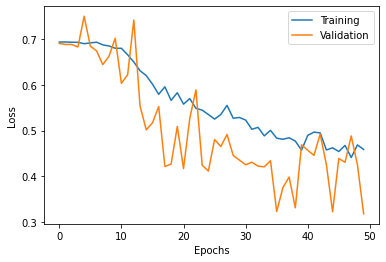

<Figure size 432x288 with 0 Axes>


Evalation and prediction from testing dataset: 
Test accuracy :  87.5 %
Predictions : 
Label :  1 (1).         True class :  malignent          Predicted class :  malignent
Label :  0 (1).         True class :  benign          Predicted class :  benign
Label :  1 (12)         True class :  malignent          Predicted class :  malignent
Label :  1 (10)         True class :  malignent          Predicted class :  malignent
Label :  1 (11)         True class :  malignent          Predicted class :  malignent
Label :  1 (15)         True class :  malignent          Predicted class :  malignent
Label :  1 (14)         True class :  malignent          Predicted class :  malignent
Label :  1 (18)         True class :  malignent          Predicted class :  malignent
Label :  1 (17)         True class :  malignent          Predicted class :  benign
Label :  1 (16)         True class :  malignent          Predicted class :  benign
Label :  1 (13)         True class :  malignent          Predict

In [12]:
#@title  main application
from google.colab import files
import os 
def main():
  analyzation_technique='train the model' #@param ["train the model", "image classification"]
  if analyzation_technique== "train the model":
    print('Training dataset : ')
    print('     No. of images : 2000')
    print('     Input size to the CNN model : 128*128') 
    print('Testing dataset : ')
    print('     No. of images : 120')
    print('     Input size to the CNN model : 128*128')
    model=define_model() 
    model=compile_fit_model(model) 
    predict_test_dataset(model)  
    model.save("/content/drive/My Drive/cancer_detection_cnn/save_files/model.h5")
  else:
    model = load_model("/content/drive/My Drive/cancer_detection_cnn/save_files/model.h5")
    image_path='' #@param {type:"string"}
    model.compile(optimizer=SGD(lr=0.1), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
    predict_image(image_path, model)
    
if __name__ == "__main__":
        main()
